In [12]:
# Coleta de dados de Inflação

!pip install sidrapy
!pip install python-bcb

import sidrapy as sidra
import pandas as pd
from bcb import sgs

In [13]:
#Importando IPCA Cheio


dados_sidra = sidra.get_table(
    
    table_code= "7060" ,#Código da Tabela de Inflação IBGE
    territorial_level = "1",
    ibge_territorial_code = "all",
    variable = "63",
    period = "all"
    
    
)

In [14]:
dados_sidra.head()

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N,D4C,D4N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Brasil (Código),Brasil,Mês (Código),Mês,Variável (Código),Variável,"Geral, grupo, subgrupo, item e subitem (Código)","Geral, grupo, subgrupo, item e subitem"
1,1,Brasil,2,%,0.21,1,Brasil,202001,janeiro 2020,63,IPCA - Variação mensal,7169,Índice geral
2,1,Brasil,2,%,0.25,1,Brasil,202002,fevereiro 2020,63,IPCA - Variação mensal,7169,Índice geral
3,1,Brasil,2,%,0.07,1,Brasil,202003,março 2020,63,IPCA - Variação mensal,7169,Índice geral
4,1,Brasil,2,%,-0.31,1,Brasil,202004,abril 2020,63,IPCA - Variação mensal,7169,Índice geral


In [55]:
dados2=(
dados_sidra.rename( columns = dados_sidra.iloc[0])
.rename(columns = {"Mês (Código)":"Data", "Valor":"IPCA AG"})
.drop(labels = 0, axis ="index")
.filter(items = ["Data", "IPCA AG"], axis = "columns")
.assign(Data= lambda x: pd.to_datetime(arg= x.Data, format= "%Y%m"))
)   
# Nova variável para incorporar as colunas que efetivamente serão utilizadas

In [49]:
import matplotlib.pyplot as plt

In [61]:
# 
dados2.info()

dados2["IPCA AG"]= pd.to_numeric(dados2["IPCA AG"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 1 to 50
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Data     50 non-null     datetime64[ns]
 1   IPCA AG  50 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 932.0 bytes


In [80]:
dados2.head()


,Data,IPCA AG
1,2020-01-01,0.21
2,2020-02-01,0.25
3,2020-03-01,0.07
4,2020-04-01,-0.31
5,2020-05-01,-0.38


In [81]:
dados2.tail()

,Data,IPCA AG
46,2023-10-01,0.24
47,2023-11-01,0.28
48,2023-12-01,0.56
49,2024-01-01,0.42
50,2024-02-01,0.83


In [76]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6

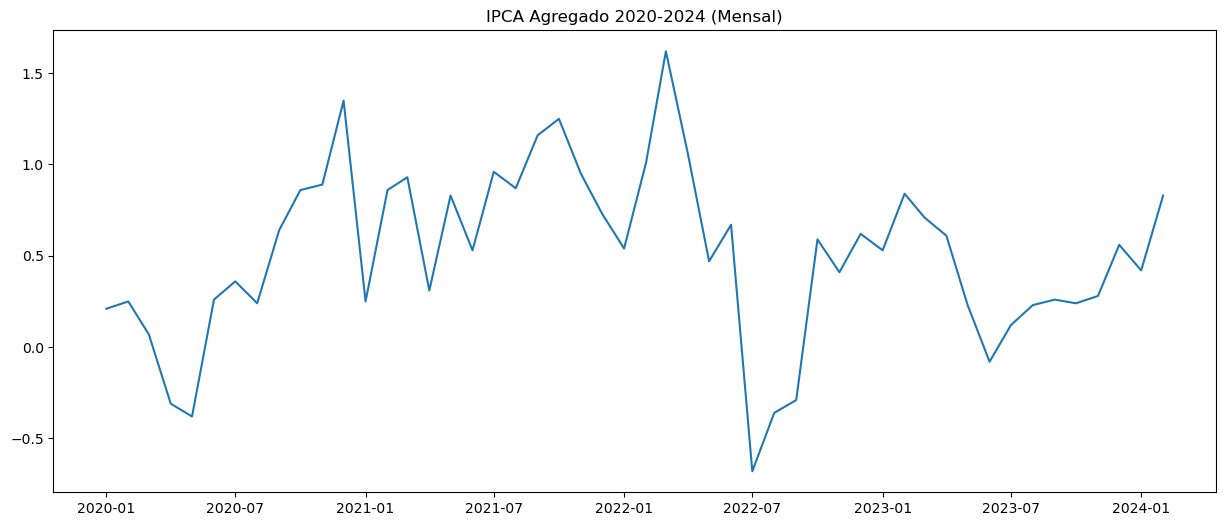

In [78]:
plt.plot(dados2["Data"], dados2["IPCA AG"])
plt.title("IPCA Agregado 2020-2024 (Mensal)")
plt.show()